In [1]:
#Importing required modules

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn import tree, metrics



df= pd.read_csv('http://cluster.earlham.edu/~apc0013/Chicago_crime.csv') # Loading dataser

Text(0, 0.5, 'Frequency')

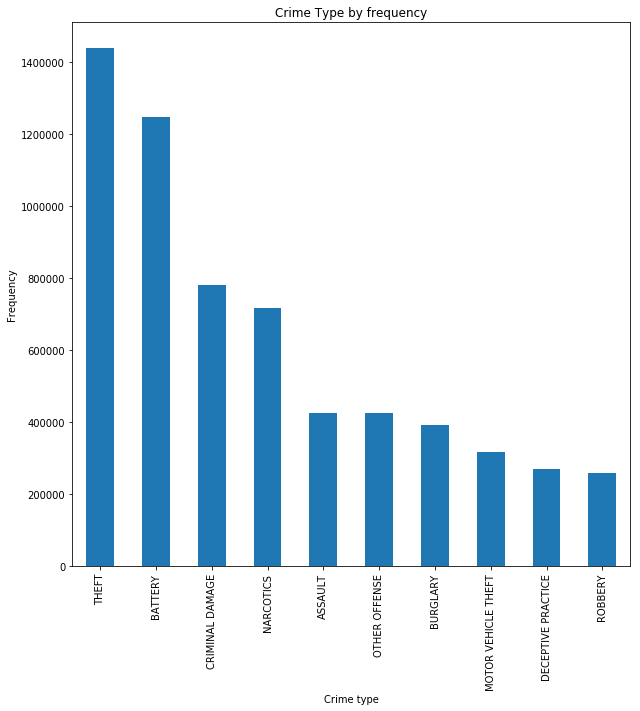

In [2]:
#Visualizing crime type and its frequency

b=df['Primary Type'].value_counts().head(10)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.gca() 
b.plot.bar(ax = ax) 
ax.set_title('Crime Type by frequency')
ax.set_xlabel('Crime type')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

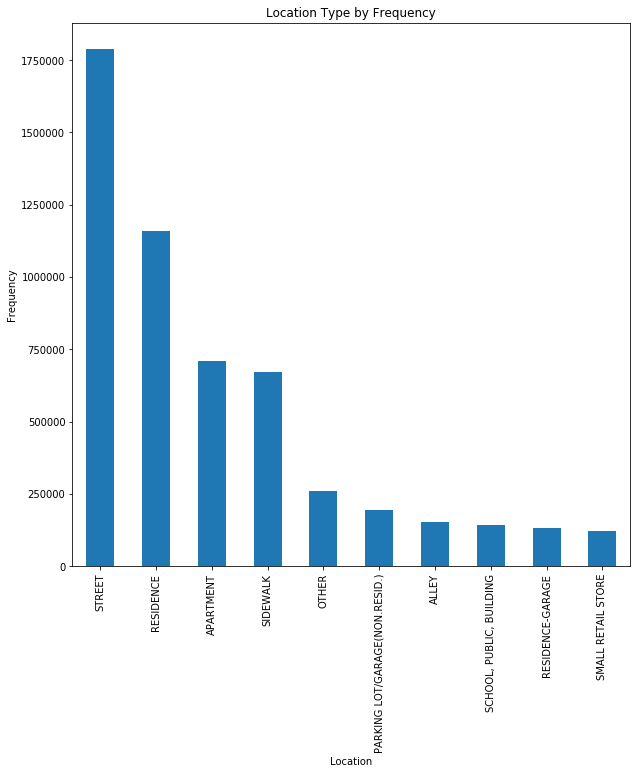

In [3]:
#Visualizing location type and its frequency

b=df['Location Description'].value_counts().head(10)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.gca() 
b.plot.bar(ax = ax) 
ax.set_title('Location Type by Frequency')
ax.set_xlabel('Location')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

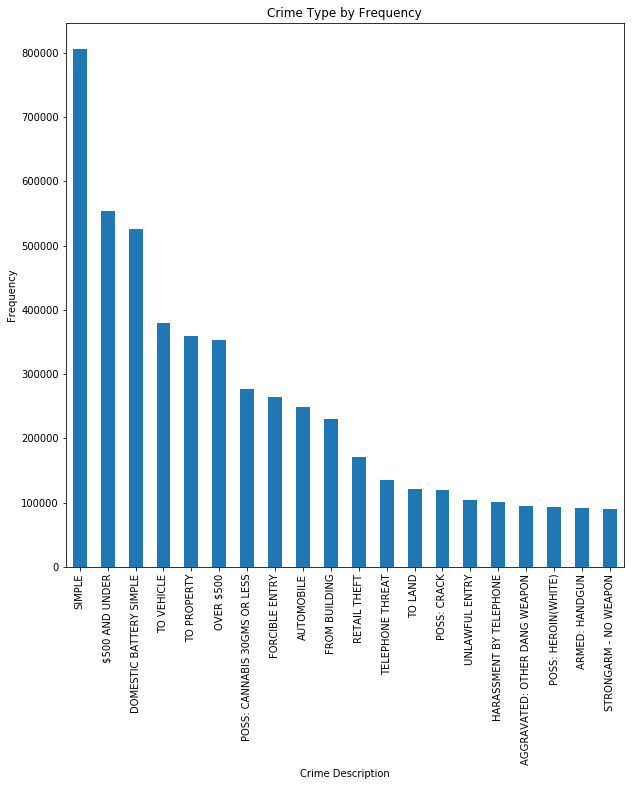

In [4]:
#Visualizing crime description and its frequency

c=df['Description'].value_counts().head(20)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.gca() 
c.plot.bar(ax = ax) 
ax.set_title('Crime Type by Frequency')
ax.set_xlabel('Crime Description')
ax.set_ylabel('Frequency')

In [5]:
#Some exploratory data analysis

aa=df[['Primary Type','Description']]
bb=aa.groupby(['Description']).count()
bb

,Primary Type
Description,
$300 AND UNDER,15
$500 AND UNDER,554442
ABUSE/NEGLECT: CARE FACILITY,116
ADULTRY,6
AGG CRIM SEX ABUSE FAM MEMBER,3342
AGG CRIMINAL SEXUAL ABUSE,5666
AGG PO HANDS ETC SERIOUS INJ,465
AGG PO HANDS NO/MIN INJURY,19680
AGG PRO EMP HANDS SERIOUS INJ,471


In [6]:
#Dropping rows with missing values

df=df.dropna()

In [7]:
#Checking to see if there's any missing values still

df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [8]:
#Correcting the data types of the columns

df["Location"] = df["Location"].astype('category')
df["Location"] = df["Location"].cat.codes
df["Block"] = df["Block"].astype('category')
df["Block"] = df["Block"].cat.codes
df["Primary Type"] = df["Primary Type"].astype('category')
df["Primary Type"] = df["Primary Type"].cat.codes
df["Community Area"] = df["Community Area"].astype('category')
df["Community Area"] = df["Community Area"].cat.codes;

In [9]:
#Proper date formatting

df.Date=pd.to_datetime(df.Date, format= '%m/%d/%Y %I:%M:%S %p')
df.index=pd.DatetimeIndex(df.Date)
df['Hour']=df['Date'].apply(lambda x: x.hour)
df['Month']=df['Date'].apply(lambda x: x.month)

In [10]:
# Choosing location based features for the model

df_imp_features=df[['Block',
'Location', 'District', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Latitude' , 'Longitude', 'Hour','Month','Primary Type']]

In [11]:
#Reseting the index

df_imp_features=df_imp_features.reset_index()

In [12]:
#Separating predictive variables with target variable. Also, removing date from our predictive variable.

X = df_imp_features.loc[:,df_imp_features.columns != 'Primary Type']
X = df_imp_features.loc[:,df_imp_features.columns != 'Date']

y = df_imp_features['Primary Type']

In [13]:
# Splitting our dataset with training size of 80% and testing size of 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [14]:
# Choosing decision tree for the model and fitting the model.

dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [15]:
y_pred = dtree.predict(X_test)

In [16]:
# Checking the accuracy score

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.81
